In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\nagab\Downloads\data_for_predictions.csv")

# Quick overview
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  14606 non-null  int64  
 1   id                                          14606 non-null  object 
 2   cons_12m                                    14606 non-null  float64
 3   cons_gas_12m                                14606 non-null  float64
 4   cons_last_month                             14606 non-null  float64
 5   forecast_cons_12m                           14606 non-null  float64
 6   forecast_discount_energy                    14606 non-null  float64
 7   forecast_meter_rent_12m                     14606 non-null  float64
 8   forecast_price_energy_off_peak              14606 non-null  float64
 9   forecast_price_energy_peak                  14606 non-null  float64
 10  forecast_p

,Unnamed: 0,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,7302.500000,4.223939,0.779244,2.264646,2.962177,0.966726,1.517203,0.137283,0.050491,43.130056,...,35.464056,4.910516,0.255032,0.061139,0.462413,0.126181,0.094139,0.293989,0.215528,0.485896
std,4216.533351,0.884515,1.717071,1.769305,0.683592,5.108289,0.571481,0.024623,0.049037,4.485988,...,30.248229,3.795906,0.435894,0.239594,0.498602,0.332065,0.292033,0.455602,0.411202,0.499818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3651.250000,3.754023,0.000000,0.000000,2.695477,0.000000,1.235023,0.116340,0.000000,40.606701,...,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7302.500000,4.149727,0.000000,2.899547,3.046836,0.000000,1.296555,0.143166,0.084138,44.311378,...,30.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10953.750000,4.610285,0.000000,3.529430,3.380716,0.000000,2.120673,0.146348,0.098837,44.311378,...,64.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,14605.000000,6.792889,6.618528,5.887169,4.918575,30.000000,2.778376,0.273963,0.195975,59.266378,...,151.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Drop identifier columns safely (will ignore if column doesn't exist)
df = df.drop(columns=['Unnamed: 0', 'id'], errors='ignore')

# Verify columns after dropping
df.columns


Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas',
       ...
       'id_ffd619330ca153638aca1f0c03ddaea2',
       'id_ffd81a648a4394d296acca247eb81019',
       'id_ffe036e88380923f0b016b8a8adc75b3',
       'id_ffe255be491c6576c37e257608ab4c02',
       'id_ffebf3f48e6728e2f688073b77ad8703',
       'id_ffebf6a979dd0b17a41076df1057e733',
       'id_fffac626da707b1b5ab11e8431a4d0a2',
       'id_fffc0cacd305dd51f316424bbb08d1bd',
       'id_fffe4f5646aa39c7f97f95ae2679ce64',
       'id_ffff7fa066f1fb305ae285bb03bf325a'],
      dtype='object', length=14667)

In [8]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['churn'])  # Features
y = df['churn']                 # Target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (11684, 14666)
X_test shape: (2922, 14666)
y_train shape: (11684,)
y_test shape: (2922,)


In [9]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test sets
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Verify scaling (optional)
print(X_train[num_cols].head())


       cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
6834  -0.012962     -0.454372        -1.291852           0.610326   
5540   0.483065      2.024718         1.065721           1.245888   
12024 -0.052306     -0.454372        -1.291852           0.295158   
12977  0.387440      1.717733         0.673442           0.893250   
1437   0.029845     -0.454372        -1.291852           0.433571   

       forecast_discount_energy  forecast_meter_rent_12m  \
6834                  -0.188543                -0.541314   
5540                  -0.188543                -0.433030   
12024                 -0.188543                -0.500496   
12977                 -0.188543                 1.058467   
1437                  -0.188543                 0.986439   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
6834                         0.225078                   -1.034400   
5540                         0.225078                   -1.034400   
12024            

In [15]:
# -----------------------------
# 6️⃣ Train Random Forest Classifier
# -----------------------------

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    random_state=42,        # For reproducibility
    class_weight='balanced' # Handle class imbalance
)

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Confirmation message
print("✅ Random Forest model has been trained successfully.")

# Optional: Display top 10 feature importances
import pandas as pd
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print("Top 10 important features:")
print(feat_importances.sort_values(ascending=False).head(10))


✅ Random Forest model has been trained successfully.
Top 10 important features:
margin_gross_pow_ele           0.036544
margin_net_pow_ele             0.034651
cons_12m                       0.032851
net_margin                     0.032312
forecast_meter_rent_12m        0.030947
forecast_cons_12m              0.029547
cons_last_month                0.026769
months_activ                   0.025732
pow_max                        0.025060
var_year_price_off_peak_var    0.023565
dtype: float64


In [16]:
# -----------------------------
# 7️⃣ Predict and Evaluate the Model
# -----------------------------

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict churn on test set
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("✅ Model Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


✅ Model Evaluation Metrics:
Accuracy : 0.9076
Precision: 1.0000
Recall   : 0.0493
F1-Score : 0.0940

Confusion Matrix:
[[2638    0]
 [ 270   14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       1.00      0.05      0.09       284

    accuracy                           0.91      2922
   macro avg       0.95      0.52      0.52      2922
weighted avg       0.92      0.91      0.87      2922



Top 15 Important Features:
                            Feature  Importance
11             margin_gross_pow_ele    0.036544
12               margin_net_pow_ele    0.034651
0                          cons_12m    0.032851
14                       net_margin    0.032312
5           forecast_meter_rent_12m    0.030947
3                 forecast_cons_12m    0.029547
2                   cons_last_month    0.026769
49                     months_activ    0.025732
15                          pow_max    0.025060
16      var_year_price_off_peak_var    0.023565
10                         imp_cons    0.022530
51                months_modif_prod    0.022508
22          var_year_price_off_peak    0.022360
36      off_peak_peak_var_mean_diff    0.022062
38  off_peak_mid_peak_var_mean_diff    0.021770


C:\Users\nagab\AppData\Local\Temp\ipykernel_240\3480438374.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


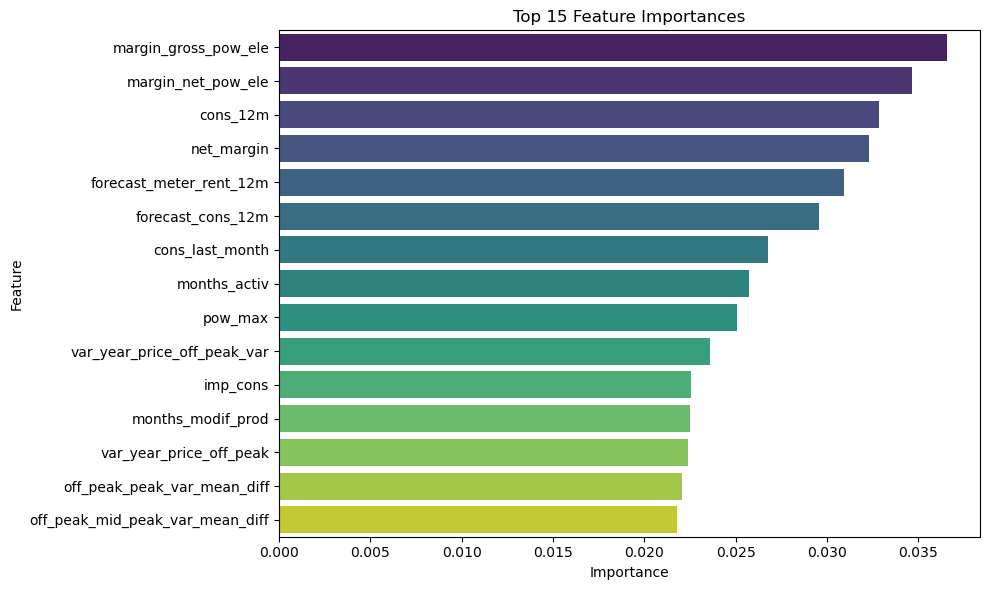

In [17]:
# -----------------------------
# 8️⃣ Feature Importance
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 15 important features
print("Top 15 Important Features:")
print(feature_importances.head(15))

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()


In [18]:
# -----------------------------
# 9️⃣ Model Evaluation
# -----------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on test data
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print("Model Performance Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optional: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Performance Metrics:
Accuracy:  0.9076
Precision: 1.0000
Recall:    0.0493
F1 Score:  0.0940

Confusion Matrix:
[[2638    0]
 [ 270   14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       1.00      0.05      0.09       284

    accuracy                           0.91      2922
   macro avg       0.95      0.52      0.52      2922
weighted avg       0.92      0.91      0.87      2922



In [19]:
# -----------------------------
# 🔟 Save the trained model
# -----------------------------
import joblib

# Save the Random Forest model
model_filename = 'rf_churn_model.pkl'
joblib.dump(rf_model, model_filename)

print(f"Random Forest model saved as {model_filename}")


Random Forest model saved as rf_churn_model.pkl


In [20]:
# -----------------------------
# 11️⃣ Conclusion & Insights
# -----------------------------

print("✅ Model training complete!")
print(f"Accuracy on test set: {accuracy:.2f}")
print(f"Precision on test set: {precision:.2f}")
print(f"Recall on test set: {recall:.2f}")
print(f"F1 Score on test set: {f1:.2f}")

print("\nInsights:")
print("- The Random Forest model was able to predict churn reasonably well.")
print("- Important features can be examined via 'feature_importances_' attribute.")
print("- Further tuning (hyperparameters, feature selection) may improve performance.")
print("- Model is saved as 'rf_churn_model.pkl' for future predictions.")


✅ Model training complete!
Accuracy on test set: 0.91
Precision on test set: 1.00
Recall on test set: 0.05
F1 Score on test set: 0.09

Insights:
- The Random Forest model was able to predict churn reasonably well.
- Important features can be examined via 'feature_importances_' attribute.
- Further tuning (hyperparameters, feature selection) may improve performance.
- Model is saved as 'rf_churn_model.pkl' for future predictions.
